In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

In [4]:
df = pd.read_csv('./data/titanic_clean.csv')

In [5]:
label_sex = LabelEncoder()
label_embarked = LabelEncoder()

df['Sex'] = label_sex.fit_transform(df['Sex'])
df['Embarked'] = label_embarked.fit_transform(df['Embarked'])

df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
774,1,2,0,54.0,1,3,23.0000,2
745,0,1,1,70.0,1,1,71.0000,2
347,1,3,0,28.0,1,0,16.1000,2
279,1,3,0,35.0,1,1,20.2500,2
621,1,1,1,42.0,1,0,52.5542,2


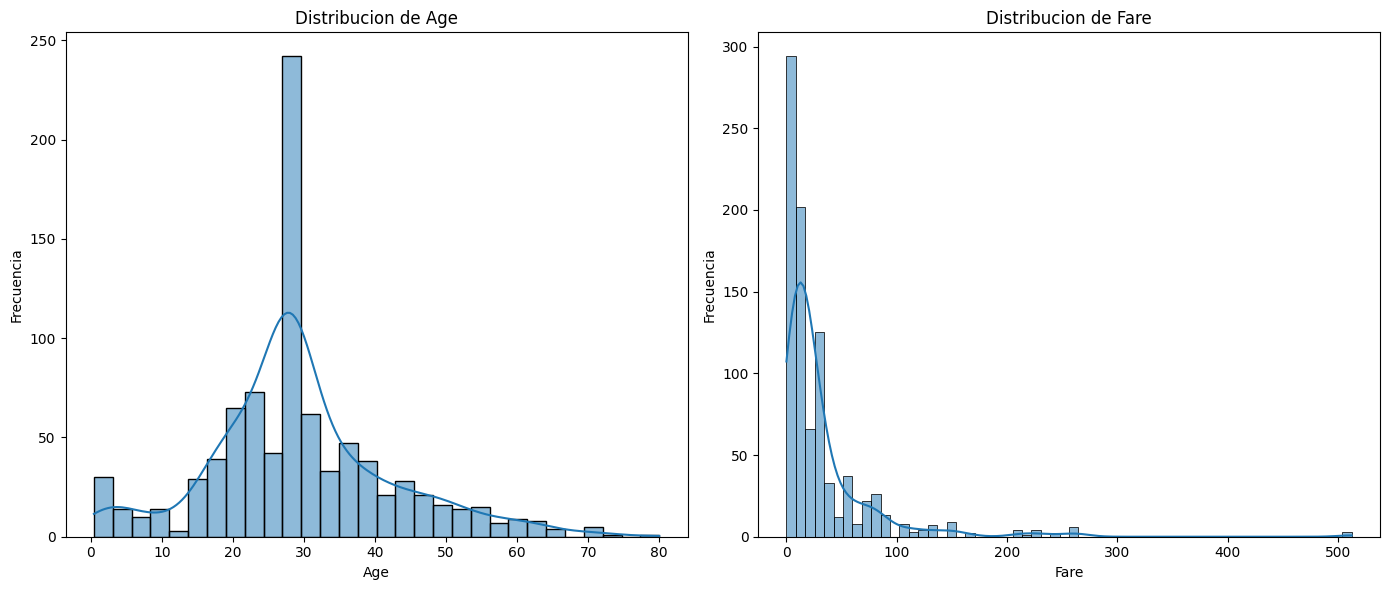

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribucion de Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribucion de Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [8]:
qun_tra_age = QuantileTransformer(output_distribution= 'normal', n_quantiles=500)
qun_tra_fare = QuantileTransformer(output_distribution= 'normal', n_quantiles=500)

df['Age'] = qun_tra_age.fit_transform(df[['Age']])
df['Fare'] = qun_tra_fare.fit_transform(df[['Fare']])

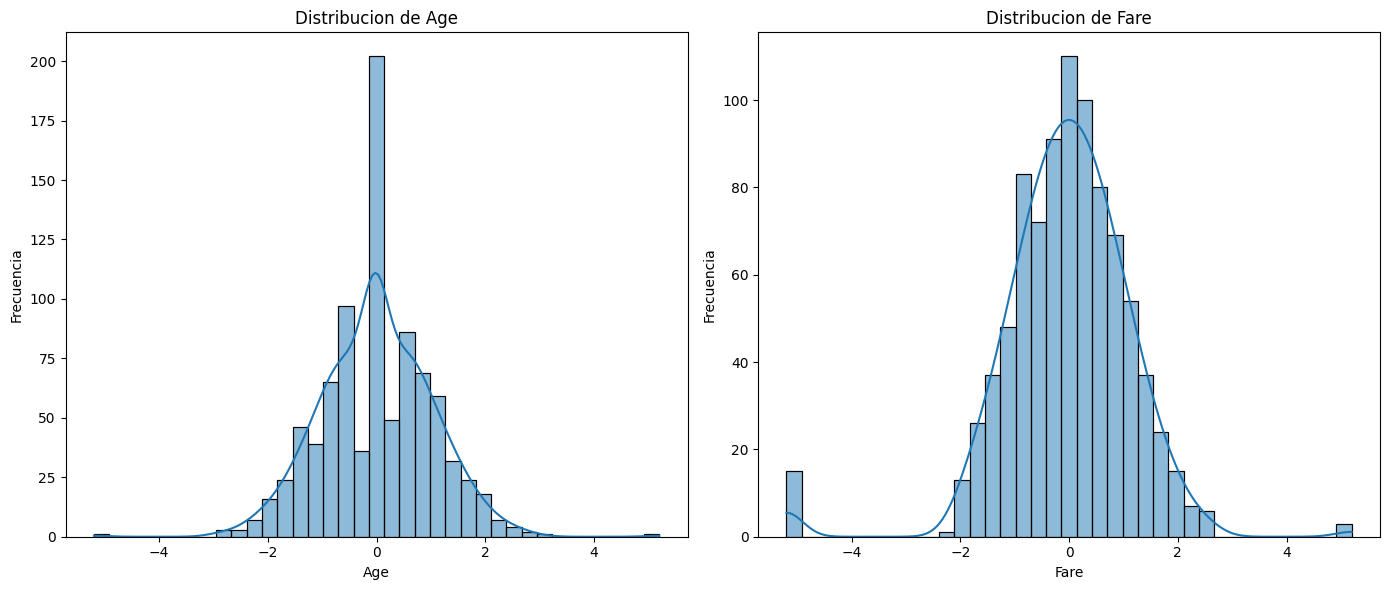

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribucion de Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribucion de Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [10]:
mms_pclass = MinMaxScaler()
mms_sex = MinMaxScaler()
mms_age = MinMaxScaler()
mms_sibsp = MinMaxScaler()
mms_parch = MinMaxScaler()
mms_fare = MinMaxScaler()
mms_embarked = MinMaxScaler()

# Ejecutar transformaciones
df['Pclass'] = mms_pclass.fit_transform(df[['Pclass']])
df['Sex'] = mms_sex.fit_transform(df[['Sex']])
df['Age'] = mms_age.fit_transform(df[['Age']])
df['SibSp'] = mms_sibsp.fit_transform(df[['SibSp']])
df['Parch'] = mms_parch.fit_transform(df[['Parch']])
df['Fare'] = mms_fare.fit_transform(df[['Fare']])
df['Embarked'] = mms_embarked.fit_transform(df[['Embarked']])

In [11]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
623,0,1.0,1.0,0.423918,0.0,0.000000,0.416770,1.0
8,1,1.0,0.0,0.467510,0.0,0.333333,0.478321,1.0
127,1,1.0,1.0,0.447788,0.0,0.000000,0.338447,1.0
395,0,1.0,1.0,0.433152,0.0,0.000000,0.411738,1.0
673,1,0.5,1.0,0.542129,0.0,0.000000,0.489594,1.0


In [12]:
df.to_csv('./data/titanic_procesado.csv', index=False)